In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelsize'] = 12

In [2]:
#propiedades = pd.read_csv('properati.csv')
propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/properati.csv')

In [4]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455309 entries, 0 to 2455308
Data columns (total 23 columns):
created_on                    object
currency                      object
expenses                      float64
fecha_de_publicacion          object
floor                         float64
lat                           float64
lon                           float64
place_name                    object
place_with_parent_names       object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
property_type                 object
rooms                         float64
state_name                    object
superficie                    float64
Year                          int64
Month                         int64
Year_created                  int64
Month_created                 int64
cantidad_meses_publicado      int64
dtypes: float64(11), int64(5),

In [5]:
#Compruebo que solo haya capital y gba
propiedades.groupby('state_name').agg(np.size)['floor']

state_name
Bs.As. G.B.A. Zona Norte    820412.0
Bs.As. G.B.A. Zona Oeste    466592.0
Bs.As. G.B.A. Zona Sur      238355.0
Capital Federal             929950.0
Name: floor, dtype: float64

### Como es el precio por metro cuadrado en cada zona? Cuales son los barrios con mayor promedio?

In [222]:
tiene_precio = propiedades['price_usd_per_m2'].notnull()

In [5]:
precio_por_zona = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 10000,['state_name','price_usd_per_m2','lat']]
precio_por_zona.loc[:,'state_name'] = precio_por_zona.loc[:,'state_name'].str.lstrip('Bs.As. ')
precio_por_zona = pd.pivot_table(precio_por_zona, values='price_usd_per_m2', columns=['state_name'],index = 'lat')
precio_por_zona.head(2)

state_name,Capital Federal,G.B.A. Zona Norte,G.B.A. Zona Oeste,G.B.A. Zona Sur
lat,,,,
-89.999744,2200.0,NaN,NaN,NaN
-87.953559,NaN,1833.333333,NaN,NaN


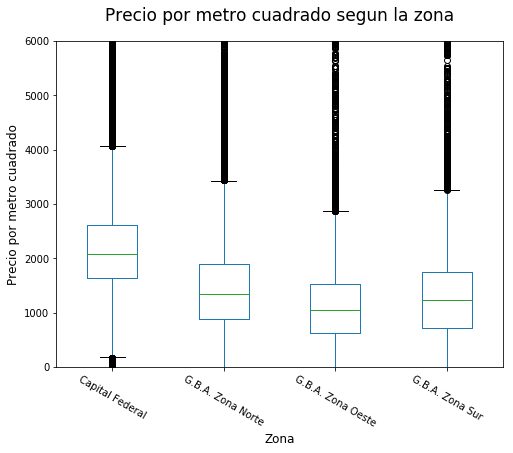

In [46]:
plot = precio_por_zona.plot(kind='box', title = "Precio por metro cuadrado segun la zona", rot = -30);
plot.set_xlabel("Zona")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_ylim([0,6000])

plt.savefig('informe/imagenes/precio_m2.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para capital federal

In [16]:
precios_capital = propiedades[tiene_precio].loc[(propiedades.state_name == 'Capital Federal') & (propiedades.place_name != 'Capital Federal')\
                                                ,['place_name','price_usd_per_m2']]
precios_capital = precios_capital.groupby('place_name').agg([np.size,np.mean])
precios_capital.describe()

price_usd_per_m2             
                  size         mean
count        62.000000    62.000000
mean       9916.483871  2362.705459
std       13471.621911   848.444749
min           1.000000   946.108213
25%        1540.750000  1910.677812
50%        5537.000000  2212.195475
75%       11857.000000  2505.198477
max       73901.000000  6392.615387

In [17]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_capital = precios_capital[precios_capital[('price_usd_per_m2','size')] > 800]

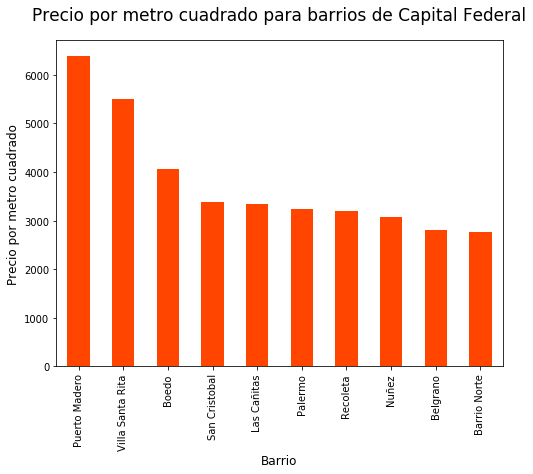

In [45]:
plot = precios_capital[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', color = 'orangered');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de Capital Federal")

plt.savefig('informe/imagenes/precio_m2_capital.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para gba zona norte

In [35]:
precios_zona_norte = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Norte'),['place_name','price_usd_per_m2']]
precios_zona_norte = precios_zona_norte.groupby('place_name').agg([np.size,np.mean])
precios_zona_norte.describe()

price_usd_per_m2              
                  size          mean
count       340.000000    340.000000
mean       1794.217647   1684.577780
std        7414.215056   1945.461670
min           1.000000     86.700571
25%          17.000000   1007.050859
50%          69.000000   1290.205656
75%         260.250000   1857.814938
max       68810.000000  28194.815849

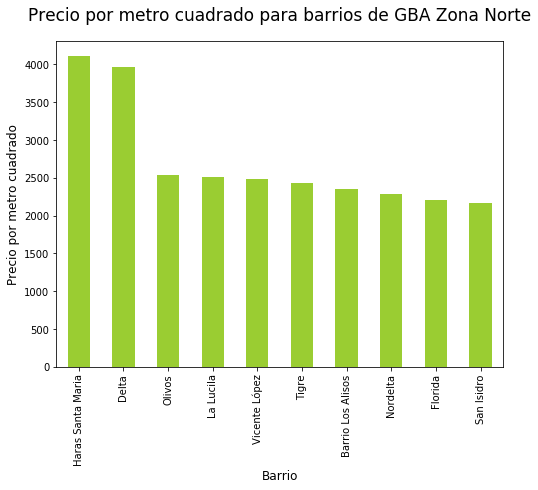

In [44]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_norte = precios_zona_norte[precios_zona_norte[('price_usd_per_m2','size')] > 800]
plot = precios_zona_norte[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar',color = 'yellowgreen');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Norte")

plt.savefig('informe/imagenes/precio_m2_norte.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para gba zona oeste

In [47]:
precios_zona_oeste = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Oeste'),['place_name','price_usd_per_m2']]
precios_zona_oeste = precios_zona_oeste.groupby('place_name').agg([np.size,np.mean])
precios_zona_oeste.describe()

price_usd_per_m2              
                  size          mean
count        88.000000     88.000000
mean       3034.602273   1402.926238
std        7045.519291   1558.779652
min           1.000000     40.870430
25%          66.750000    770.781965
50%         346.000000   1055.920853
75%        2194.750000   1539.934805
max       48490.000000  11598.750000

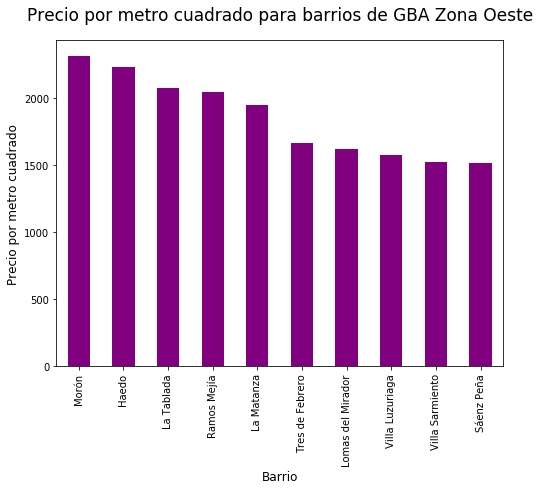

In [48]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_oeste = precios_zona_oeste[precios_zona_oeste[('price_usd_per_m2','size')] > 800]
plot = precios_zona_oeste[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', color = 'purple');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Oeste")

plt.savefig('informe/imagenes/precios_m2_oeste.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para gba zona sur

In [49]:
precios_zona_sur = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Sur'),['place_name','price_usd_per_m2']]
precios_zona_sur = precios_zona_sur.groupby('place_name').agg([np.size,np.mean])
precios_zona_sur.describe()

price_usd_per_m2               
                  size           mean
count       144.000000     144.000000
mean        906.069444    2342.159877
std        2844.642482    9190.094238
min           1.000000       0.000000
25%          24.000000     643.241429
50%          72.500000    1087.644434
75%         451.250000    1594.669353
max       22160.000000  102857.142857

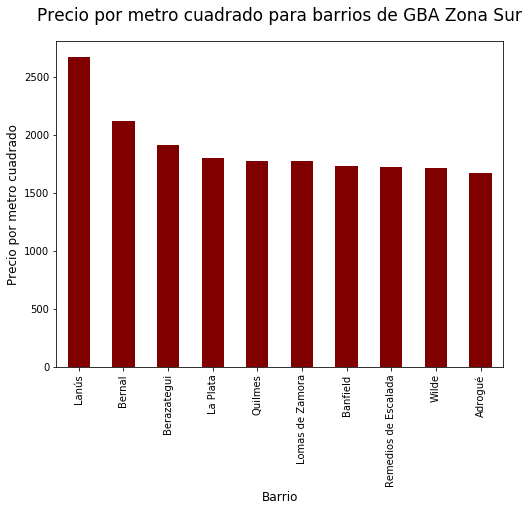

In [50]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_sur = precios_zona_sur[precios_zona_sur[('price_usd_per_m2','size')] > 800]
plot = precios_zona_sur[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar',color = 'maroon');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Sur")

plt.savefig('informe/imagenes/precios_m2_sur.png', bbox_inches = 'tight', pad_inches = 0.5)

### Como evoluciono el precio por metro cuadrado al pasar los anios?

In [6]:
precio_por_anio = propiedades[tiene_precio].loc[:,['Year','price_usd_per_m2']].groupby('Year').agg([np.size,np.mean])
precio_por_anio = precio_por_anio.loc[precio_por_anio[('price_usd_per_m2','size')] > 100,:]
precio_por_anio

price_usd_per_m2             
                 size         mean
Year                              
2013         199349.0  2369.190254
2014         345284.0  1890.479226
2015         450676.0  1714.803593
2016         311484.0  2151.086818
2017         381930.0  2735.672688

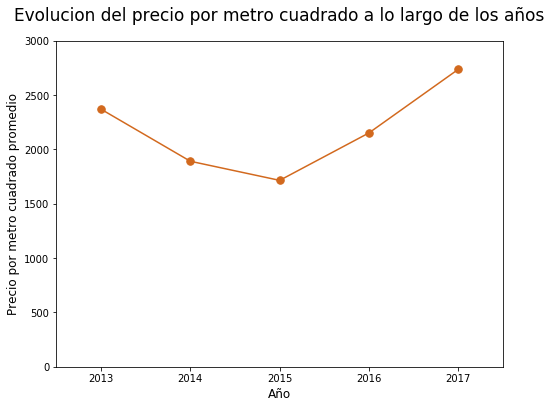

In [7]:
plot = precio_por_anio[('price_usd_per_m2','mean')].plot(marker = '.', markersize = 15, color = 'chocolate');
plot.set_xlabel("Año")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_ylim([0,3000])
plot.set_xlim([2012.5,2017.5])
plot.set_xticks([2013,2014,2015,2016,2017])
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años");

plt.savefig('informe/imagenes/evolucion_pecio_m2.png', bbox_inches = 'tight', pad_inches = 0.5)

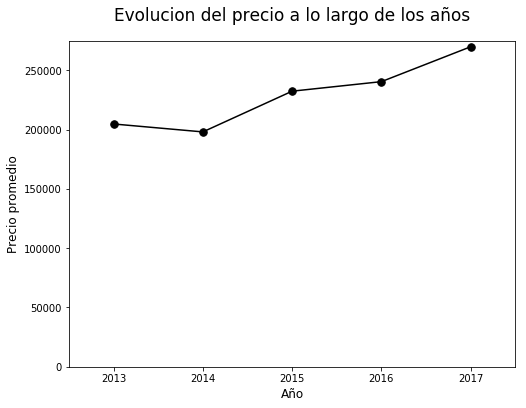

In [8]:
precio_por_anio2 = propiedades.loc[propiedades.price_aprox_usd.notnull(),['Year','price_aprox_usd']].groupby('Year').agg([np.size,np.mean])
precio_por_anio2 = precio_por_anio2.loc[precio_por_anio2[('price_aprox_usd','size')] > 100,:]
plot = precio_por_anio2[('price_aprox_usd','mean')].plot(color='black',marker = '.', markersize = 15);
plot.set_xlabel("Año")
plot.set_ylabel("Precio promedio")
plot.set_ylim([0,275000])
plot.set_xlim([2012.5,2017.5])
plot.set_title("Evolucion del precio a lo largo de los años")
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_precio.png', bbox_inches = 'tight', pad_inches = 0.5)

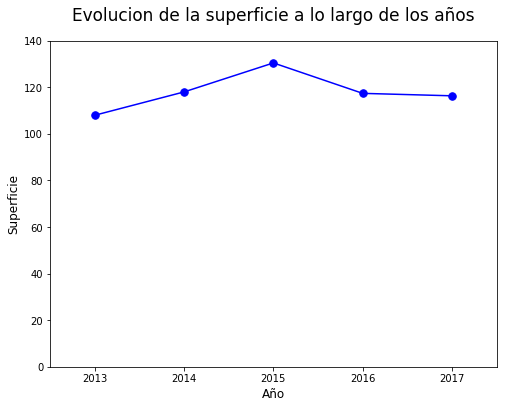

In [9]:
precio_por_anio3 = propiedades.loc[(propiedades.superficie.notnull()) & (propiedades.superficie < 500),['Year','superficie']].groupby('Year').agg([np.size,np.mean])
precio_por_anio3 = precio_por_anio3.loc[precio_por_anio3[('superficie','size')] > 100,:]
plot = precio_por_anio3[('superficie','mean')].plot(color='blue',marker = '.', markersize = 15);
plot.set_xlabel("Año")
plot.set_ylabel("Superficie")
plot.set_title("Evolucion de la superficie a lo largo de los años")
plot.set_xlim([2012.5,2017.5])
plot.set_ylim([0,140])
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_superficie.png', bbox_inches = 'tight', pad_inches = 0.5)

### Como evoluciono el precio por metro cuadrado en en cada anio?

In [10]:
precios_2016 = propiedades[tiene_precio].loc[propiedades.Year == 2016,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2015 = propiedades[tiene_precio].loc[propiedades.Year == 2015,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2014 = propiedades[tiene_precio].loc[propiedades.Year == 2014,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)


In [11]:
precios_2016 = precios_2016.rename(columns={'price_usd_per_m2': '2016'}).reset_index()
precios_2015 = precios_2015.rename(columns={'price_usd_per_m2': '2015'}).reset_index()
precios_2014 = precios_2014.rename(columns={'price_usd_per_m2': '2014'}).reset_index()
precios = pd.merge(precios_2016,precios_2015,on='Month',how='outer')
precios = pd.merge(precios,precios_2014,on='Month',how='outer')
precios.set_index('Month', inplace = True)
precios

,2016,2015,2014
Month,,,
1,1831.190767,1677.568481,2102.573404
2,1849.816972,1723.479619,2079.900913
3,1966.921313,1565.270512,1912.878483
4,2059.532984,1583.533208,1928.181890
5,2078.260781,1607.606635,1911.892901
6,2095.725003,1629.178322,1928.651897
7,2160.555576,1618.955606,1938.728071
8,2208.922107,1712.221020,1697.860709
9,2231.013673,1657.230560,1657.700065


In [12]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',\
                 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

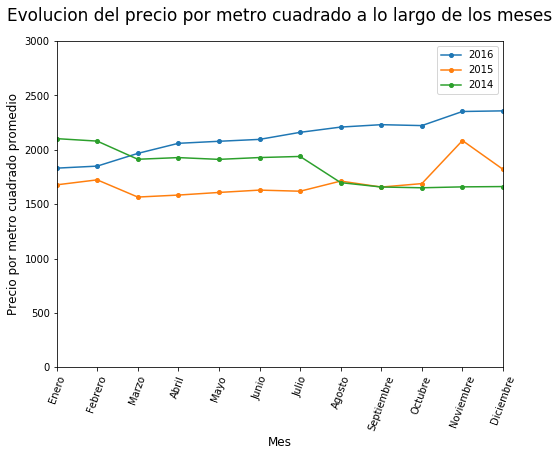

In [13]:
plot = precios.plot(rot = 70, marker = '.', markersize = 8);
plot.set_xlabel("Mes")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los meses")
plot.set_ylim([0,3000]);
plot.set_xticks(precios.index);
plot.set_xticklabels(meses);

plt.savefig('informe/imagenes/evolucion_precio_m2_por_mes.png', bbox_inches = 'tight', pad_inches = 0.5)

### Que tipo de propiedad se vende mas?

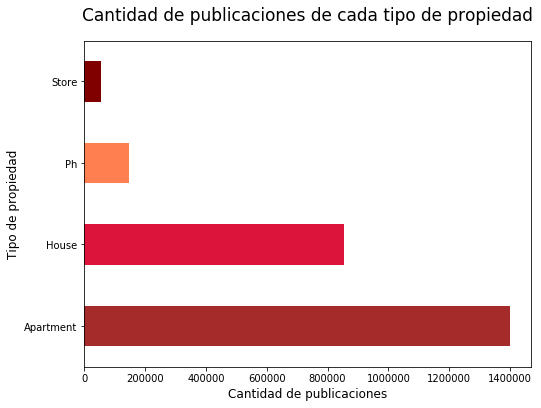

In [59]:
colors_prop = ['brown','crimson', 'coral', 'maroon']
tipos_propiedades = propiedades.loc[:,'property_type'].str.capitalize().value_counts()
plot = tipos_propiedades.plot(kind='barh', color = [colors_prop]);
plot.set_title("Cantidad de publicaciones de cada tipo de propiedad")
plot.set_ylabel("Tipo de propiedad")
plot.set_xlabel("Cantidad de publicaciones")

plt.savefig('informe/imagenes/publicaciones_por_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

In [60]:
precio_tipos_propiedades = propiedades.loc[(propiedades.price_aprox_usd <= 2000000) & (propiedades.price_aprox_usd >= 10000)\
                                           ,['property_type','price_aprox_usd','lat']]
precio_tipos_propiedades.loc[:,'property_type'] = precio_tipos_propiedades.loc[:,'property_type'].str.capitalize()

precio_tipos_propiedades = pd.pivot_table(precio_tipos_propiedades, values='price_aprox_usd', columns=['property_type'],index = 'lat')

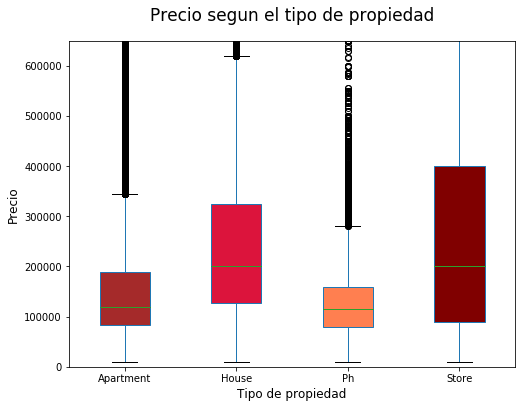

In [61]:
plot = precio_tipos_propiedades.plot.box(patch_artist=True,return_type='dict')
ax=plt.gca()
ax.set_xlabel("Tipo de propiedad")
ax.set_ylabel("Precio")
ax.set_title("Precio segun el tipo de propiedad")
ax.set_ylim([0,650000])

for patch, color in zip(plot['boxes'], colors_prop ):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/precio_segun_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

In [3]:
precio_tipos_propiedades = propiedades.loc[(propiedades.price_usd_per_m2 <= 10000) & (propiedades.price_usd_per_m2 >= 1000)\
                                           ,['property_type','price_usd_per_m2','lat']]
precio_tipos_propiedades.loc[:,'property_type'] = precio_tipos_propiedades.loc[:,'property_type'].str.capitalize()

precio_tipos_propiedades = pd.pivot_table(precio_tipos_propiedades, values='price_usd_per_m2', columns=['property_type'],index = 'lat')

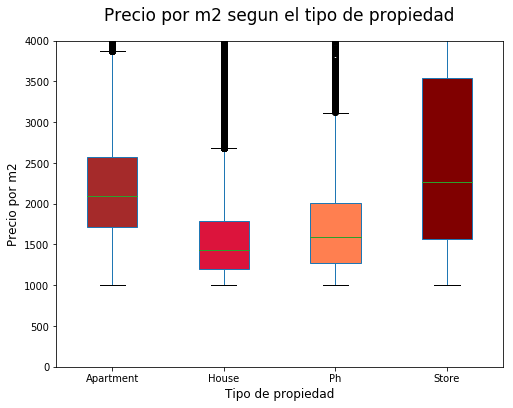

In [7]:
plot = precio_tipos_propiedades.plot.box(patch_artist=True,return_type='dict')
ax=plt.gca()
ax.set_xlabel("Tipo de propiedad")
ax.set_ylabel("Precio por m2")
ax.set_title("Precio por m2 segun el tipo de propiedad")
ax.set_ylim([0,4000])

for patch, color in zip(plot['boxes'], colors_prop ):
    patch.set_facecolor(color)
    
plt.savefig('informe/imagenes/precio_m2_segun_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

## Barrios con mayor cantidad de negocios

In [60]:
propiedades.loc[(propiedades.state_name == 'Capital Federal') & (propiedades.property_type == 'store'),:]\
.groupby('place_name').agg(np.size)['floor'].sort_values(ascending = False).head(10)

place_name
Palermo                 3372.0
Villa Crespo            1780.0
Capital Federal         1705.0
Centro / Microcentro    1481.0
Belgrano                1305.0
Barrio Norte            1205.0
Balvanera               1182.0
Once                    1085.0
Flores                   871.0
San Telmo                805.0
Name: floor, dtype: float64

## Cantidad de casas y departamentos en barrios caros

In [224]:
barrios_caros = list(propiedades.loc[propiedades.state_name == 'Capital Federal',:].groupby('place_name')\
                     .agg(np.mean)['price_usd_per_m2'].sort_values(ascending = False).head(5).keys())

barrios_caros

['Puerto Madero',
 'Villa Santa Rita',
 'Boedo',
 'San Cristobal',
 'Las Ca\xc3\xb1itas']

In [225]:
s=propiedades.loc[(propiedades.property_type == 'house') | (propiedades.property_type == 'apartment'),:]\
.groupby(['property_type','place_name']).agg(np.size)

In [226]:
departamentos = []
casas = []
for x in barrios_caros:
    departamentos.append(s.floor['apartment'][x])
    casas.append(s.floor['house'][x])

In [227]:
x_labels = barrios_caros
x_labels[4] = 'Las canitas'

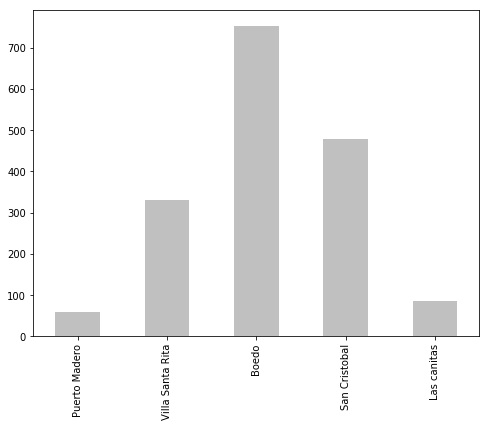

In [232]:
pd.Series(casas).plot(color = "silver", kind = 'bar')
ax=plt.gca()
ax.set_xticklabels(x_labels, rotation = 90)

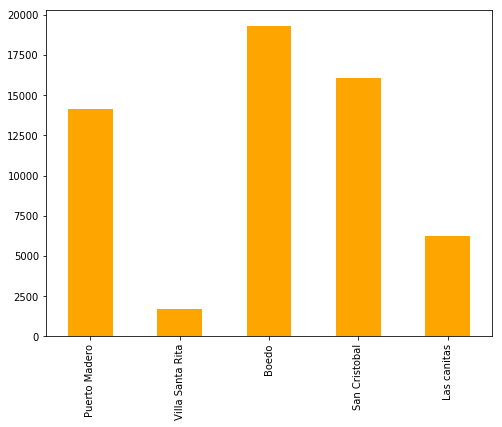

In [233]:
pd.Series(departamentos).plot(color = "orange", kind = 'bar')
ax=plt.gca()
ax.set_xticklabels(x_labels, rotation = 90)

##### Se puede ver que la cantidad de departamentos supera enormemente a la cantidad de casas en los 5 barrios mas caros de Capital Federal.

## Cual es la relacion entre la superficie cubierta y la cantidad de habitaciones?

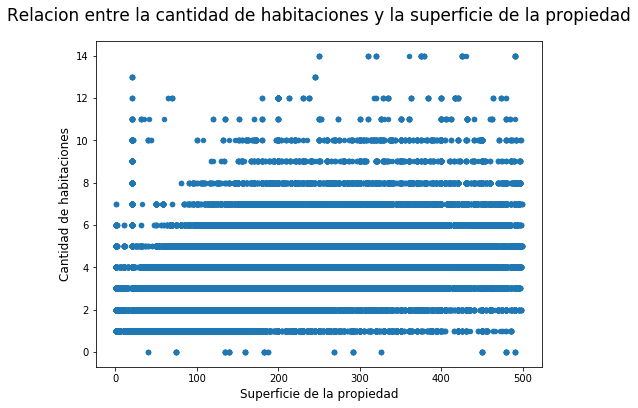

In [62]:
tiene_superficie = propiedades['superficie'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull()
habitaciones = propiedades.loc[tiene_superficie & tiene_habitaciones,:]
habitaciones = habitaciones.loc[(habitaciones['superficie'] < 500) & (habitaciones['rooms'] < 15 ),:]
plot = habitaciones.plot.scatter(x = 'superficie', y = 'rooms');
plot.set_xlabel("Superficie de la propiedad")
plot.set_ylabel("Cantidad de habitaciones")
plot.set_title("Relacion entre la cantidad de habitaciones y la superficie de la propiedad")

plt.savefig('informe/imagenes/cantidad_habitaciones_y_superficie.png', bbox_inches = 'tight', pad_inches = 0.5)

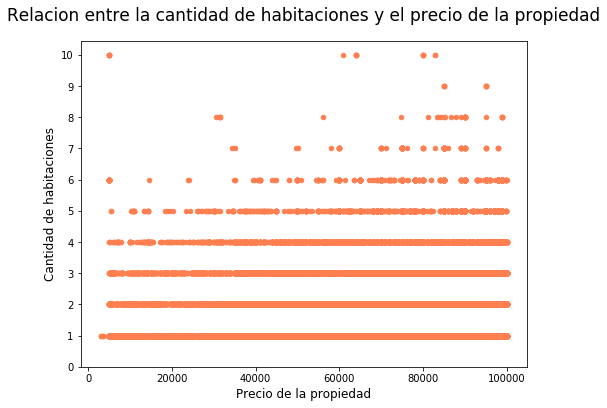

In [63]:
tiene_precio_usd = propiedades['price_aprox_usd'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull() & propiedades['rooms'] > 0
hab = propiedades.loc[tiene_precio_usd & tiene_habitaciones,:]
hab = hab.loc[(hab['price_aprox_usd'] > 1000) & (hab['price_aprox_usd'] < 100000) & (hab['rooms'] <= 10),:]
plot = hab.plot.scatter(x = 'price_aprox_usd', y = 'rooms', color = 'coral');
plot.set_xlabel("Precio de la propiedad")
plot.set_ylabel("Cantidad de habitaciones")
plot.set_title("Relacion entre la cantidad de habitaciones y el precio de la propiedad")
plot.set_yticks(list(range(11)));

plt.savefig('informe/imagenes/cantidad_habitaciones_y_precio.png', bbox_inches = 'tight', pad_inches = 0.5)

##### se ve que las propiedades mas baratas no tiene mas de 4-5 habitaciones y que solo las mas caras tiene mas de 6

## Tomamos algunos barrios importantes y hacemos comparaciones

In [223]:
barrios = ['Palermo', 'Vicente López', 'Lomas de Zamora', 'La Matanza', 'Puerto Madero']  #Elegi uno de cada zona
df = []
for barrio in barrios:
    a = propiedades[tiene_precio].loc[propiedades.place_name == barrio,['Year','price_usd_per_m2']]\
    .groupby('Year').agg(np.mean).reset_index().rename(columns={'price_usd_per_m2' : barrio})
    df.append(a)

In [224]:
precios_barrios = df[0]
for x in range (1,len(barrios)):
    precios_barrios = pd.merge(precios_barrios,df[x],how='outer')
precios_barrios.set_index("Year",inplace = True)
precios_barrios

,Palermo,Vicente López,Lomas de Zamora,La Matanza,Puerto Madero
Year,,,,,
2013,3045.593394,2773.353764,2468.826751,2821.583231,4696.674601
2014,2965.790436,2175.935660,1587.086071,1867.924150,4764.807481
2015,3139.452200,2140.177017,1592.004317,1625.846192,5201.386716
2016,3318.524747,2429.855370,1612.371211,1930.060818,5651.673447
2017,3601.772003,3346.559792,1997.987134,1888.998619,7990.173212


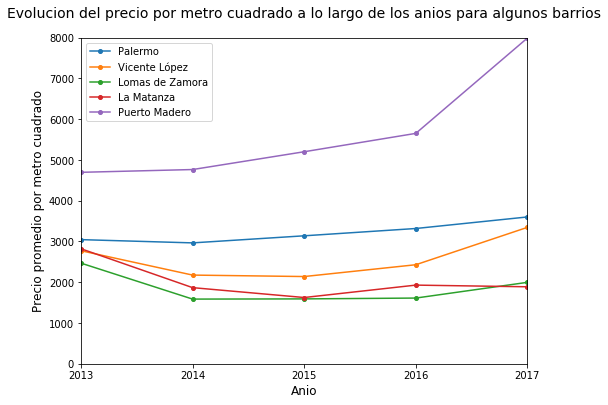

In [226]:
plot = precios_barrios.plot(marker = '.', markersize = 8);
plot.set_xlabel("Año")
plot.set_ylabel("Precio promedio por metro cuadrado")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años para algunos barrios",size = 14)
plot.set_ylim([0,8000]);
plot.set_xticks([2013,2014,2015,2016,2017]);

#plt.savefig('informe/imagenes/evolucion_precio_m2_algunos_barrios.png', bbox_inches = 'tight', pad_inches = 0.5)

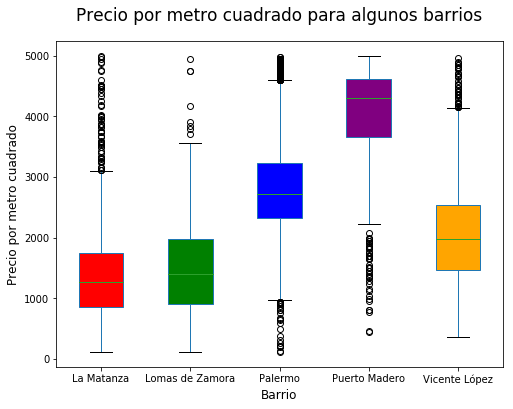

In [232]:
precios_barrios2 = propiedades.loc[(propiedades.price_usd_per_m2 < 5000) &\
                        (propiedades.price_usd_per_m2 > 100)&((propiedades.place_name == barrios[0]) | \
                          (propiedades.place_name == barrios[1]) | (propiedades.place_name == barrios[2])\
                        | (propiedades.place_name == barrios[3]) | (propiedades.place_name == barrios[4])),\
        ['lon','place_name','price_usd_per_m2']].pivot_table(index='lon',columns='place_name')
precios_barrios2.columns = precios_barrios2.columns.droplevel()
boxplot = precios_barrios2.plot.box(patch_artist=True,return_type='dict', title="Precio por metro cuadrado para algunos barrios");
ax=plt.gca()
ax.set_ylabel('Precio por metro cuadrado')
ax.set_xlabel('Barrio')


colors = ['red' , 'green', 'blue', 'purple','orange'] #Mismos colores del grafico de lineas de arriba
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

#plt.savefig('informe/imagenes/precio_m2_algunos_barrios.png', bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precios y distancia a lugares importantes

In [18]:
#El archivo es el obtenido al ejecutar Calcular distancias

solo_capital = pd.read_csv('solo_capital.csv')
#solo_capital = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/solo_capital.csv')

In [69]:
solo_capital['distancia_monumentos'].describe()

count    854797.000000
mean          4.366964
std           6.579666
min           0.023206
25%           1.469629
50%           3.046057
75%           5.600211
max         450.296945
Name: distancia_monumentos, dtype: float64

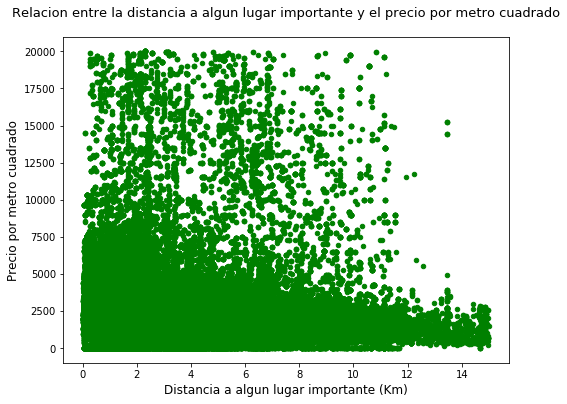

In [70]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_monumentos < 15),:]
plot = dist.plot.scatter(x = 'distancia_monumentos', y = 'price_usd_per_m2', color = 'green');
plot.set_xlabel("Distancia a algun lugar importante (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a algun lugar importante y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_precio_distancia_lugares_importantes.png', bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre el precio y cercania a los subtes

In [71]:
solo_capital['distancia_subtes'].describe()

count    854797.000000
mean          1.616011
std           5.883526
min           0.000356
25%           0.386925
50%           0.629416
75%           1.159004
max         444.444997
Name: distancia_subtes, dtype: float64

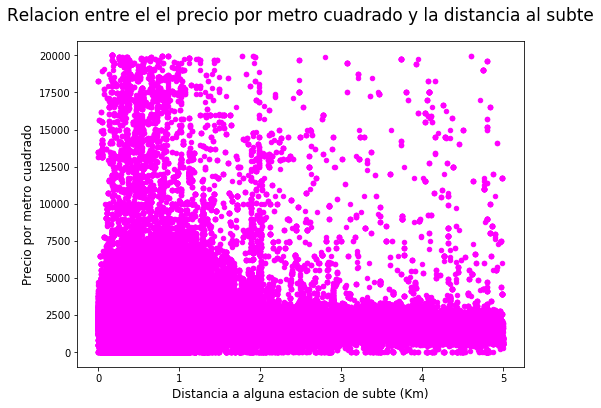

In [72]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_subtes < 5),:]
plot = dist.plot.scatter(x = 'distancia_subtes', y = 'price_usd_per_m2', color = 'fuchsia');
plot.set_xlabel("Distancia a alguna estacion de subte (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre el el precio por metro cuadrado y la distancia al subte")

plt.savefig('informe/imagenes/Relacion_precio_distancia_subte.png', bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre el precio y el piso del depto

In [73]:
piso_maximo = 20  

departamentos = propiedades.loc[(propiedades.property_type == 'apartment') & (propiedades.floor.notnull())\
                               & (propiedades.floor <= piso_maximo)]
departamentos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388377 entries, 0 to 2455239
Data columns (total 23 columns):
created_on                    388377 non-null object
currency                      355983 non-null object
expenses                      36083 non-null float64
fecha_de_publicacion          388377 non-null object
floor                         388377 non-null float64
lat                           293036 non-null float64
lon                           293036 non-null float64
place_name                    388377 non-null object
place_with_parent_names       388377 non-null object
price                         357355 non-null float64
price_aprox_local_currency    357355 non-null float64
price_aprox_usd               357355 non-null float64
price_per_m2                  102967 non-null float64
price_usd_per_m2              297383 non-null float64
property_type                 388377 non-null object
rooms                         266207 non-null float64
state_name                    3

In [74]:
departamentos['floor'].describe()

count    388377.000000
mean          4.504072
std           3.615925
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          20.000000
Name: floor, dtype: float64

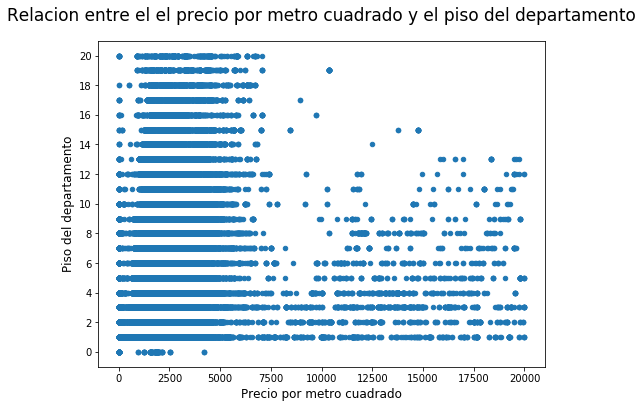

In [75]:
plot = departamentos.loc[(departamentos.price_usd_per_m2.notnull()) & (departamentos.price_usd_per_m2 <= 20000), :].plot\
            .scatter(y = 'floor', x = 'price_usd_per_m2');
plot.set_ylabel("Piso del departamento");
plot.set_xlabel("Precio por metro cuadrado");
plot.set_title("Relacion entre el el precio por metro cuadrado y el piso del departamento");
plot.set_yticks(list(range(0,21,2)));

plt.savefig('informe/imagenes/Relacion_precio_piso.png', bbox_inches = 'tight', pad_inches = 0.5)

#### cuanto mas alto, mas barato el precio por m2

# relacion entre expensas y precio total

In [76]:
expensas = propiedades.loc[(propiedades.expenses.notnull()) & (propiedades.expenses <= 10000) & (propiedades.expenses > 100),:]
expensas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120606 entries, 56 to 2455308
Data columns (total 23 columns):
created_on                    120606 non-null object
currency                      114941 non-null object
expenses                      120606 non-null float64
fecha_de_publicacion          120606 non-null object
floor                         36153 non-null float64
lat                           107699 non-null float64
lon                           107699 non-null float64
place_name                    120592 non-null object
place_with_parent_names       120606 non-null object
price                         115679 non-null float64
price_aprox_local_currency    115679 non-null float64
price_aprox_usd               115679 non-null float64
price_per_m2                  81814 non-null float64
price_usd_per_m2              105668 non-null float64
property_type                 120606 non-null object
rooms                         93885 non-null float64
state_name                    12

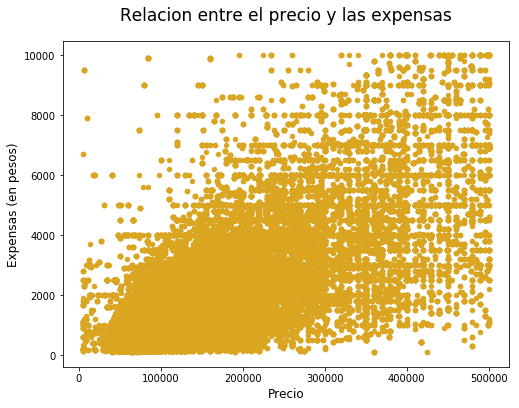

In [77]:
expensas_y_precio = expensas.loc[(expensas.price_aprox_usd.notnull()) & (expensas.price_aprox_usd <= 500000) & (expensas.price_aprox_usd > 100),:]
plot = expensas_y_precio.plot.scatter(y = 'expenses', x = 'price_aprox_usd', color = 'goldenrod');
plot.set_ylabel("Expensas (en pesos)")
plot.set_xlabel("Precio")
plot.set_title("Relacion entre el precio y las expensas")

plt.savefig('informe/imagenes/Relacion_precio_expensas.png', bbox_inches = 'tight', pad_inches = 0.5)

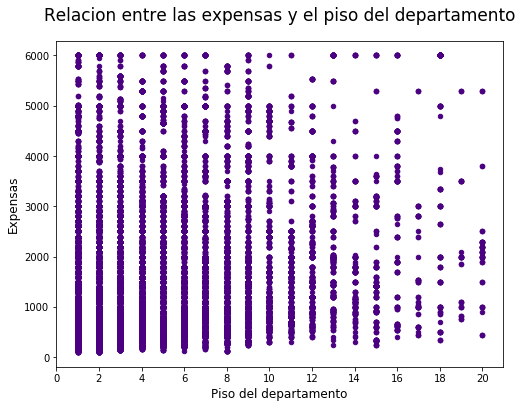

In [78]:
expensas_y_piso = expensas.loc[(expensas.floor.notnull()) & (expensas.floor <= piso_maximo) & (expensas.expenses <= 6000),:]
plot = expensas_y_piso.plot.scatter(y = 'expenses', x = 'floor', color = 'indigo');
plot.set_ylabel("Expensas")
plot.set_xlabel("Piso del departamento")
plot.set_title("Relacion entre las expensas y el piso del departamento");
plot.set_xticks(list(range(0,21,2)));

plt.savefig('informe/imagenes/Relacion_expensas_piso.png', bbox_inches = 'tight', pad_inches = 0.5)

#### cuanto mas caro mas expensas paga

# Analizando fecha de creacion y fecha de publicacion

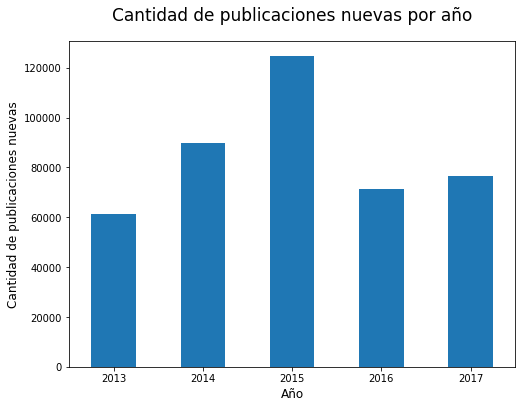

In [19]:
publicaciones = propiedades.loc[(propiedades.Year == propiedades.Year_created) & (propiedades.Month == propiedades.Month_created),['Month','Year']]
plot = publicaciones.groupby('Year').agg([np.size,np.mean])[('Month', 'size')].plot(kind = 'bar', rot = 0);
plot.set_ylabel("Cantidad de publicaciones nuevas")
plot.set_xlabel("Año")
plot.set_title("Cantidad de publicaciones nuevas por año")

plt.savefig('informe/imagenes/cantidad_publicaciones_nuevas_por_anio.png', bbox_inches = 'tight', pad_inches = 0.5)

#### Tener en cuenta que 2017 no termino, y ya tiene mas que 2016 y 2013

In [20]:
publicados = propiedades.loc[:,['lat','lon','cantidad_meses_publicado', 'Year','Month']].groupby(['lat','lon']).max()
publicados.head()

,,cantidad_meses_publicado,Year,Month
lat,lon,,,
-89.999744,135.000000,2,2015,11
-87.953559,164.531250,3,2015,11
-76.516815,100.000000,4,2014,11
-58.804368,58.804368,3,2014,12
-58.430839,-34.571160,3,2014,12


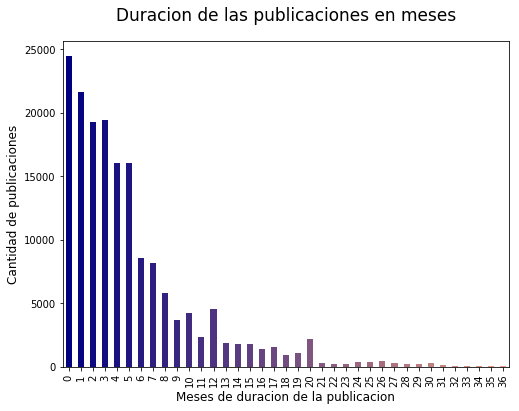

In [21]:
publicados = publicados.loc[(publicados.Year != 2017) | (publicados.Month < 7),:] #Elimino los de julio 2017 porque puede ser que no hayan terminado
publicados = publicados.loc[(publicados.cantidad_meses_publicado >= 0) & (publicados.cantidad_meses_publicado <= 36),:]
publicados = publicados.groupby('cantidad_meses_publicado').agg([np.size,np.mean])[('Year','size')]

my_colors = [(x/40.0, x/60.0, 0.5) for x in range(len(publicados))]

plot = publicados.plot(kind = 'bar', color = [my_colors]);
plot.set_ylabel("Cantidad de publicaciones")
plot.set_xlabel("Meses de duracion de la publicacion")
plot.set_title("Duracion de las publicaciones en meses")

plt.savefig('informe/imagenes/Duracion_publicaciones_en_meses.png',bbox_inches = 'tight', pad_inches = 0.5)

## Precio según la distancia a estadios

In [22]:
solo_capital['distancia_estadios'].describe()

count    854010.000000
mean          2.163391
std           4.261051
min           0.016482
25%           1.054489
50%           1.623409
75%           2.337971
max          73.379965
Name: distancia_estadios, dtype: float64

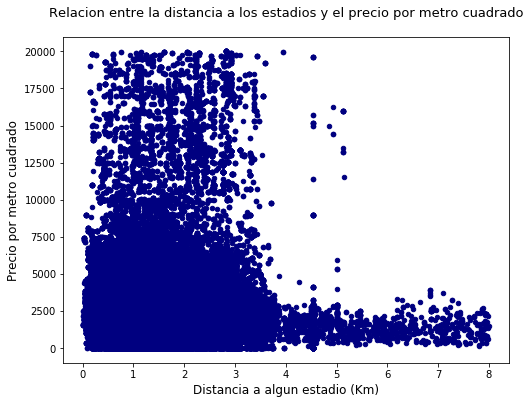

In [23]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_estadios < 8),:]
plot = dist.plot.scatter(x = 'distancia_estadios', y = 'price_usd_per_m2', color = 'navy');
plot.set_xlabel("Distancia a algun estadio (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a los estadios y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_estadios_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y distancia a ferrocarriles

In [24]:
solo_capital['distancia_ferrocarril'].describe()

count    854010.000000
mean          1.476525
std           4.215710
min           0.004265
25%           0.580326
50%           0.914144
75%           1.387432
max          73.071740
Name: distancia_ferrocarril, dtype: float64

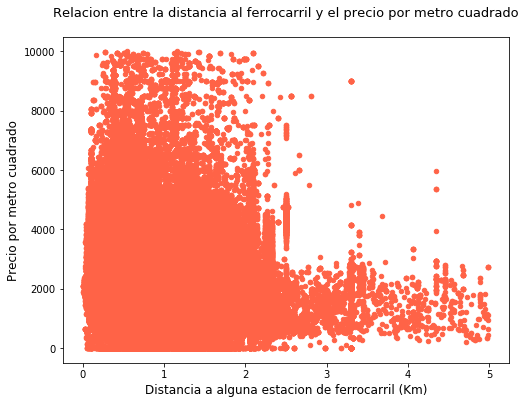

In [25]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 10000) & \
                        (solo_capital.distancia_ferrocarril < 5),:]
plot = dist.plot.scatter(x = 'distancia_ferrocarril', y = 'price_usd_per_m2', color = 'tomato');
plot.set_xlabel("Distancia a alguna estacion de ferrocarril (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia al ferrocarril y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_ferrocarril_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y cantidad de servicios cerca

### Servicios: Bibliotecas, bomberos, comisarias, hospitales, universidades, clinicas y centros medicos

In [ ]:
solo_capital['servicios'].describe()

In [ ]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & \
                        (solo_capital.servicios < 100),:]
plot = dist.plot.scatter(x = 'servicios', y = 'price_usd_per_m2', color = 'green');
plot.set_xlabel("Cantidad de servicios cercanos")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la cantidad de servicios cercanos y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_cantidad_servicios_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y zonas de inundaciones

In [26]:
solo_capital['Zona_inundacion'].value_counts()

False    741463
True     112547
Name: Zona_inundacion, dtype: int64

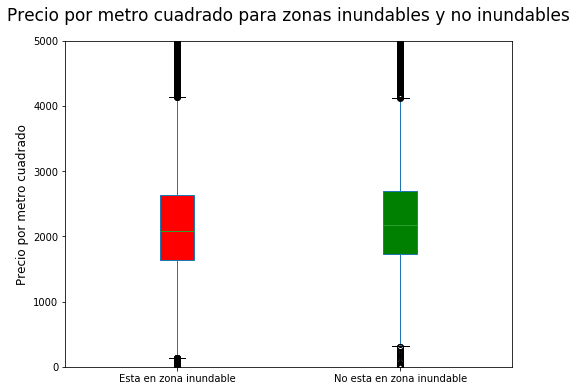

In [27]:
inundaciones = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) ,\
                               ['lat','price_usd_per_m2', 'Zona_inundacion']]\
                .pivot_table(index='lat',columns='Zona_inundacion')
inundaciones.columns = inundaciones.columns.droplevel()
boxplot = inundaciones.plot.box(patch_artist=True,return_type='dict', \
                                title="Precio por metro cuadrado para zonas inundables y no inundables");
ax=plt.gca()
ax.set_ylabel('Precio por metro cuadrado')
ax.set_xticklabels(['Esta en zona inundable', 'No esta en zona inundable'])
ax.set_ylim([0,5000]);


colors = ['red' , 'green'] 
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/Precio_m2_en_zonas_inundables.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y cercania a las villas

In [2]:
solo_capital = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/propiedades_descripcion.csv')
solo_capital.head(1)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,description,expenses,fecha_de_publicacion,lat,lon,place_name,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,property_type,state_name,superficie,Year,distancia_villas
0,NaN,850 aprox,2013-07-01,-34.561208,-58.464514,Belgrano,NaN,NaN,NaN,NaN,NaN,apartment,Capital Federal,102.0,2013,2.363494


In [3]:
min(solo_capital.distancia_villas)

0.0

In [6]:
solo_capital.keys()

Index([u'description', u'expenses', u'fecha_de_publicacion', u'lat', u'lon',
       u'place_name', u'price', u'price_aprox_local_currency',
       u'price_aprox_usd', u'price_per_m2', u'price_usd_per_m2',
       u'property_type', u'state_name', u'superficie', u'Year',
       u'distancia_villas'],
      dtype='object')

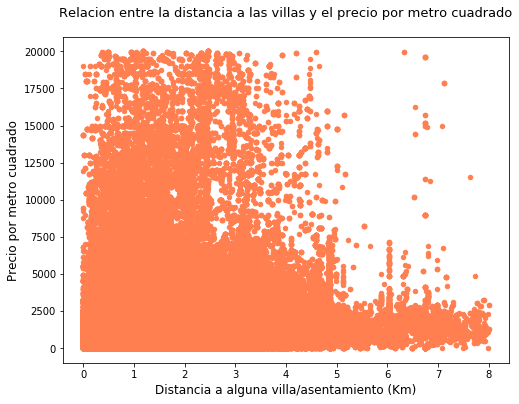

In [5]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_villas < 8),:]
plot = dist.plot.scatter(x = 'distancia_villas', y = 'price_usd_per_m2', color = 'coral');
plot.set_xlabel("Distancia a alguna villa/asentamiento (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a las villas y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_villa_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

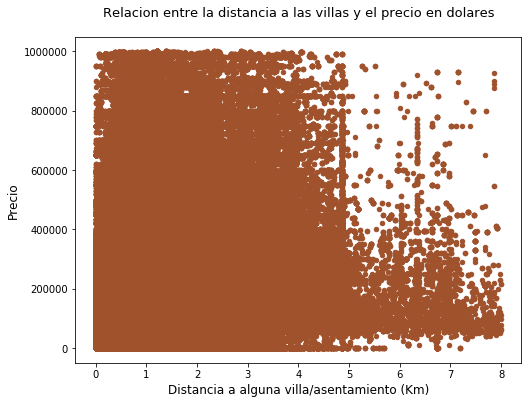

In [7]:
dist = solo_capital.loc[(solo_capital.price_aprox_usd.notnull()) & (solo_capital.price_aprox_usd < 1000000) & (solo_capital.distancia_villas < 8),:]
plot = dist.plot.scatter(x = 'distancia_villas', y = 'price_aprox_usd', color = 'sienna');
plot.set_xlabel("Distancia a alguna villa/asentamiento (Km)")
plot.set_ylabel("Precio")
plot.set_title("Relacion entre la distancia a las villas y el precio en dolares",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_villa_precio_usd.png',bbox_inches = 'tight', pad_inches = 0.5)

Tomando solo el 2017

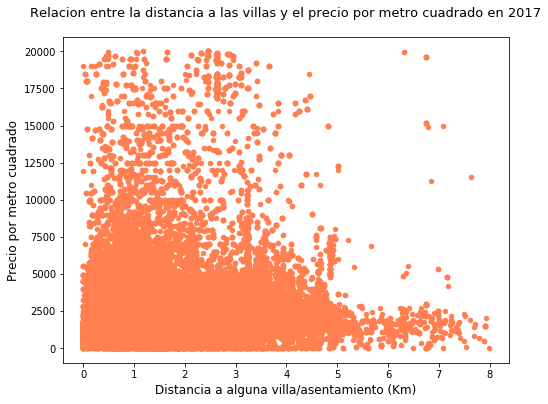

In [8]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_villas < 8) & (solo_capital.Year == 2017),:]
plot = dist.plot.scatter(x = 'distancia_villas', y = 'price_usd_per_m2', color = 'coral');
plot.set_xlabel("Distancia a alguna villa/asentamiento (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a las villas y el precio por metro cuadrado en 2017",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_villa_precio_m2_2017.png',bbox_inches = 'tight', pad_inches = 0.5)

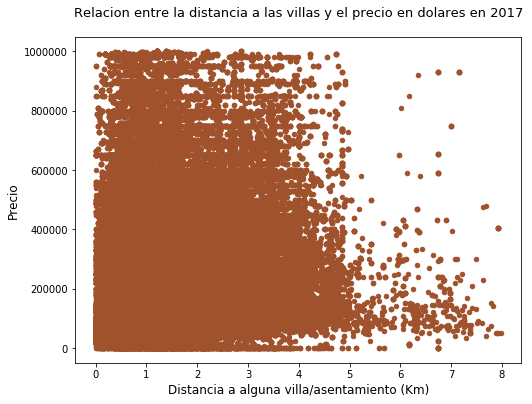

In [9]:
dist = solo_capital.loc[(solo_capital.price_aprox_usd.notnull()) & (solo_capital.price_aprox_usd < 1000000) & (solo_capital.distancia_villas < 8) & (solo_capital.Year == 2017),:]
plot = dist.plot.scatter(x = 'distancia_villas', y = 'price_aprox_usd', color = 'sienna');
plot.set_xlabel("Distancia a alguna villa/asentamiento (Km)")
plot.set_ylabel("Precio")
plot.set_title("Relacion entre la distancia a las villas y el precio en dolares en 2017",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_villa_precio_usd_2017.png',bbox_inches = 'tight', pad_inches = 0.5)

## Casos especificos usando la descripcion

In [2]:
#propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/properati-6.csv')
propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/propiedades_descripcion.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
propiedades.head(1)

,description,expenses,fecha_de_publicacion,lat,lon,place_name,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,property_type,state_name,superficie,Year
1614307,CODIGO: 1558-131 ubicado en: RICARDO GUTIERREZ...,NaN,2016-01-01,-34.603282,-58.525425,Ramos Mejía,490000.0,7824565.0,490000.0,1093.75,1093.75,house,Bs.As. G.B.A. Zona Oeste,448.0,2016


In [3]:
propiedades = propiedades.loc[propiedades.description.notnull(),:]

In [4]:
# Me quedo solo con 2016 y 2017 para que no caiga tanto el precio
propiedades= propiedades.loc[(propiedades.Year==2016) | (propiedades.Year==2017),:]

In [5]:
# Descarto los negocios
propiedades = propiedades.loc[propiedades.property_type != 'store',:]

In [6]:
tiene_precio = propiedades['price_usd_per_m2'].notnull()

In [7]:
def tiene_cadena(cadena, lista):
    cadena = str(cadena)
    cadena = cadena.lower()
    resultado = False
    for x in lista:
        resultado = resultado or (x in cadena)
    return resultado

### Precio segun pileta

In [8]:
cadenas = ['pileta', 'piscina', 'picina','pisina', 'yaccuzi', ' jacuzzi', 'jacuzi',\
           'yacuzi', 'yacusi', 'jacussi', 'hidromasaje']
propiedades.loc[:,'Pileta'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [9]:
propiedades.Pileta.describe()

count     813541
unique         2
top        False
freq      531698
Name: Pileta, dtype: object

In [10]:
pileta = propiedades[tiene_precio].loc[ :,['Pileta','price_usd_per_m2']]
pileta = pileta.groupby('Pileta').agg([np.size,np.mean])

pileta.head()

price_usd_per_m2             
                   size         mean
Pileta                              
False          430836.0  2273.791034
True           241608.0  2682.948852

In [11]:
pileta = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['Pileta','price_usd_per_m2','lat']]
pileta = pd.pivot_table(pileta, values='price_usd_per_m2', columns=['Pileta'],index = 'lat')
pileta.head(2)

Pileta,False,True
lat,,
-41.167596,NaN,3038.895060
-38.952611,NaN,1413.043478


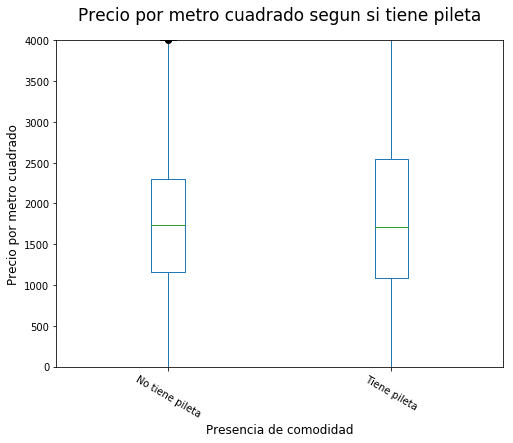

In [70]:
plot = pileta.plot(kind='box', title = "Precio por metro cuadrado segun si tiene pileta", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene pileta', 'Tiene pileta'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_pileta.png', bbox_inches = 'tight', pad_inches = 0.5)

### Precio si tiene elementos de climatizacion

In [13]:
cadenas = ['aire frio', 'aire acondicionado', 'split', 'aires acondicionados', 'climatizador', 'central',\
          'losa radiante', 'piso radiante', 'pisoradiante', 'loza radiante', 'los radiantes', 'radante',
          'radiador']
propiedades.loc[:,'aire'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [15]:
propiedades.aire.describe()

count     813541
unique         2
top        False
freq      584896
Name: aire, dtype: object

In [16]:
propiedades[tiene_precio].loc[ :,['aire','price_usd_per_m2']].groupby('aire').agg([np.size,np.mean]).head()

price_usd_per_m2             
                  size         mean
aire                               
False         470331.0  2402.953164
True          202113.0  2462.333327

In [17]:
aire = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['aire','price_usd_per_m2','lat']]
aire = pd.pivot_table(aire, values='price_usd_per_m2', columns=['aire'],index = 'lat')
aire.head(2)

aire,False,True
lat,,
-41.167596,3038.895060,NaN
-38.952611,1413.043478,NaN


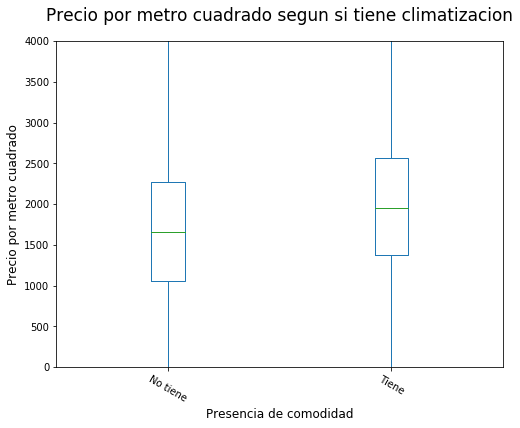

In [71]:
plot = aire.plot(kind='box', title = "Precio por metro cuadrado segun si tiene climatizacion", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene', 'Tiene'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_climatizacion.png', bbox_inches = 'tight', pad_inches = 0.5)

### Precio si tiene cochera

In [20]:
cadenas = ['cochera', 'garage', 'estacionamiento', 'entrada de auto']
propiedades.loc[:,'cochera'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [143]:
propiedades.cochera.describe()

count     813541
unique         2
top        False
freq      426825
Name: cochera, dtype: object

In [21]:
propiedades[tiene_precio].loc[ :,['cochera','price_usd_per_m2']].groupby('cochera').agg([np.size,np.mean]).head()

price_usd_per_m2             
                    size         mean
cochera                              
False           352102.0  2368.572892
True            320342.0  2478.206691

In [22]:
garage = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['cochera','price_usd_per_m2','lat']]
garage = pd.pivot_table(garage, values='price_usd_per_m2', columns=['cochera'],index = 'lat')
garage.head(2)

cochera,False,True
lat,,
-41.167596,3038.895060,NaN
-38.952611,1413.043478,NaN


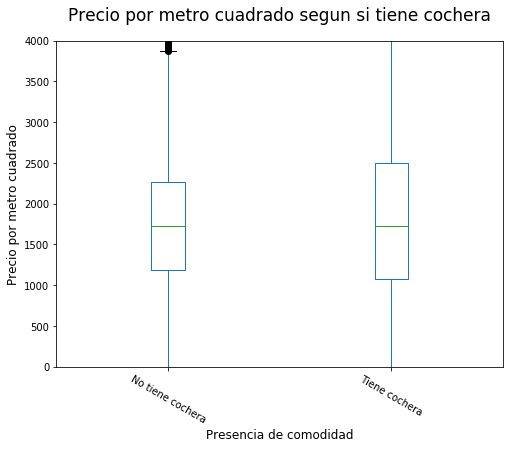

In [72]:
plot = garage.plot(kind='box', title = "Precio por metro cuadrado segun si tiene cochera", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene cochera', 'Tiene cochera'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_cochera.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene lago/vista al mar

In [24]:
cadenas = ['lago', 'mar']
propiedades.loc[:,'lago'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [148]:
propiedades.lago.describe()

count     813541
unique         2
top        False
freq      593997
Name: lago, dtype: object

In [25]:
propiedades[tiene_precio].loc[ :,['lago','price_usd_per_m2']].groupby('lago').agg([np.size,np.mean]).head()

price_usd_per_m2             
                  size         mean
lago                               
False         486216.0  2403.834750
True          186228.0  2465.096674

In [26]:
lago = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['lago','price_usd_per_m2','lat']]
lago = pd.pivot_table(lago, values='price_usd_per_m2', columns=['lago'],index = 'lat')
lago.head(2)

lago,False,True
lat,,
-41.167596,NaN,3038.89506
-38.952611,1413.043478,NaN


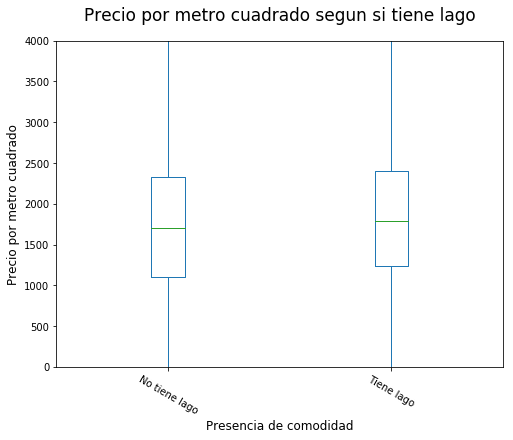

In [73]:
plot = lago.plot(kind='box', title = "Precio por metro cuadrado segun si tiene lago", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene lago', 'Tiene lago'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_lago.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene parrilla

In [29]:
cadenas = ['parrilla', 'asador', 'asado', 'asadera']
propiedades.loc[:,'parrilla'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [153]:
propiedades.parrilla.describe()

count     813541
unique         2
top        False
freq      510208
Name: parrilla, dtype: object

In [30]:
propiedades[tiene_precio].loc[ :,['parrilla','price_usd_per_m2']].groupby('parrilla').agg([np.size,np.mean]).head()

price_usd_per_m2             
                     size         mean
parrilla                              
False            414076.0  2367.036326
True             258368.0  2506.966833

In [31]:
parrilla = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['parrilla','price_usd_per_m2','lat']]
parrilla = pd.pivot_table(parrilla, values='price_usd_per_m2', columns=['parrilla'],index = 'lat')
parrilla.head(2)

parrilla,False,True
lat,,
-41.167596,3038.89506,NaN
-38.952611,NaN,1413.043478


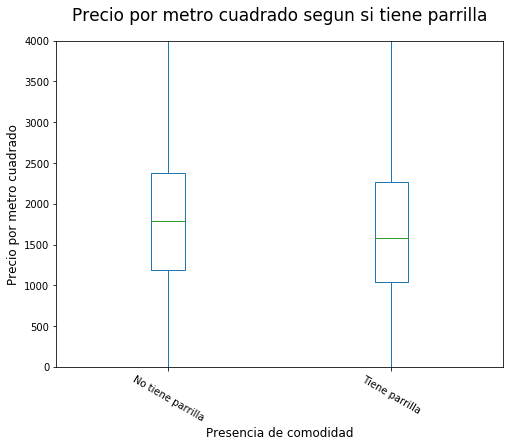

In [74]:
plot = parrilla.plot(kind='box', title = "Precio por metro cuadrado segun si tiene parrilla", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene parrilla', 'Tiene parrilla'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_parrilla.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tienen gimnasio

In [33]:
cadenas = ['gimnasio', 'gym', 'gimnacio']
propiedades.loc[:,'gimnasio'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [158]:
propiedades.gimnasio.describe()

count     813541
unique         2
top        False
freq      736246
Name: gimnasio, dtype: object

In [34]:
propiedades[tiene_precio].loc[ :,['gimnasio','price_usd_per_m2']].groupby('gimnasio').agg([np.size,np.mean]).head()

price_usd_per_m2             
                     size         mean
gimnasio                              
False            603523.0  2319.591185
True              68921.0  3307.066199

In [35]:
gim = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['gimnasio','price_usd_per_m2','lat']]
gim = pd.pivot_table(gim, values='price_usd_per_m2', columns=['gimnasio'],index = 'lat')
gim.head(2)

gimnasio,False,True
lat,,
-41.167596,NaN,3038.895060
-38.952611,NaN,1413.043478


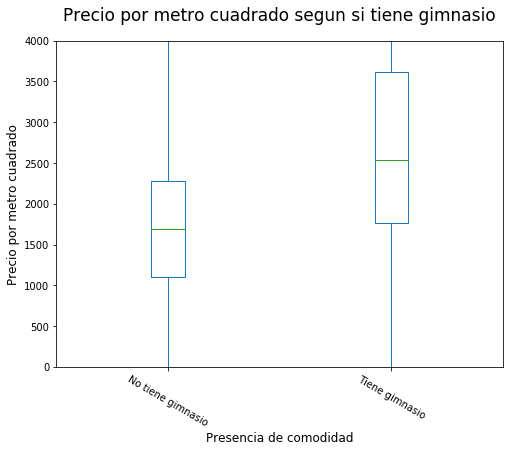

In [75]:
plot = gim.plot(kind='box', title = "Precio por metro cuadrado segun si tiene gimnasio", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene gimnasio', 'Tiene gimnasio'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_gimnasio.png', bbox_inches = 'tight', pad_inches = 0.5)

In [ ]:
# Son pocos pero mas caros. Pensar en otros posibles sinonimos para ver de que

### Tiene elementos que aportan a la seguridad

In [37]:
cadenas = ['vigilancia', 'seguridad', 'alarma', 'blindado', 'blindaje', 'guardia']
propiedades.loc[:,'seguridad'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [163]:
propiedades.seguridad.describe()

count     813541
unique         2
top        False
freq      705681
Name: seguridad, dtype: object

In [38]:
propiedades[tiene_precio].loc[ :,['seguridad','price_usd_per_m2']].groupby('seguridad').agg([np.size,np.mean]).head()

price_usd_per_m2             
                      size         mean
seguridad                              
False             576663.0  2343.832718
True               95781.0  2884.197637

In [39]:
vig = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['seguridad','price_usd_per_m2','lat']]
vig = pd.pivot_table(vig, values='price_usd_per_m2', columns=['seguridad'],index = 'lat')
vig.head(2)

seguridad,False,True
lat,,
-41.167596,NaN,3038.895060
-38.952611,NaN,1413.043478


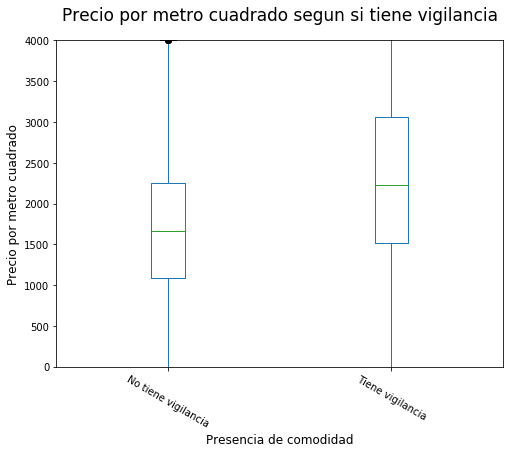

In [76]:
plot = vig.plot(kind='box', title = "Precio por metro cuadrado segun si tiene vigilancia", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene vigilancia', 'Tiene vigilancia'])
plot.set_ylim([0,4000])

plt.savefig('informe/imagenes/precio_m2_vigilancia.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene comodidades

In [41]:
cadenas = ['golf', 'cancha', 'tenis', 'futbol', 'basquet', 'basket', 'volley', 'clubhouse',\
           'club house', 'cine', 'juego', 'play']
propiedades.loc[:,'deportes'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [174]:
propiedades.deportes.describe()

count     813541
unique         2
top        False
freq      679983
Name: deportes, dtype: object

In [42]:
propiedades[tiene_precio].loc[ :,['deportes','price_usd_per_m2']].groupby('deportes').agg([np.size,np.mean]).head()

price_usd_per_m2             
                     size         mean
deportes                              
False            555491.0  2358.335215
True             116953.0  2717.492957

In [43]:
deportes = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['deportes','price_usd_per_m2','lat']]
deportes = pd.pivot_table(deportes, values='price_usd_per_m2', columns=['deportes'],index = 'lat')
deportes.head(2)

deportes,False,True
lat,,
-41.167596,NaN,3038.89506
-38.952611,1413.043478,NaN


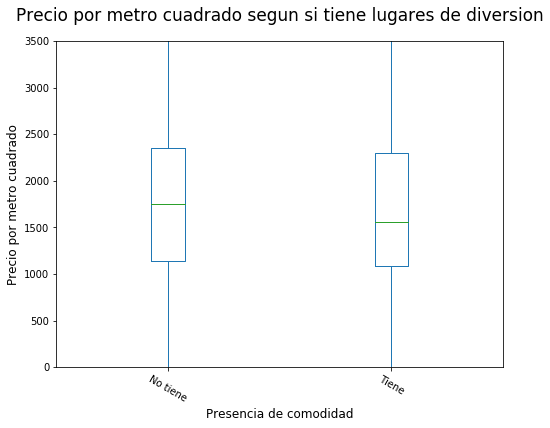

In [77]:
plot = deportes.plot(kind='box', title = "Precio por metro cuadrado segun si tiene lugares de diversion", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene', 'Tiene'])
plot.set_ylim([0,3500])

plt.savefig('informe/imagenes/precio_m2_deportes.png', bbox_inches = 'tight', pad_inches = 0.5)

### Tiene jardin

In [46]:
cadenas = ['jardin', 'jardín', 'parque', 'fondo', 'verde', 'patio']
propiedades.loc[:,'jardin'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [208]:
propiedades.jardin.describe()

count     813541
unique         2
top        False
freq      432376
Name: jardin, dtype: object

In [47]:
propiedades[tiene_precio].loc[ :,['jardin','price_usd_per_m2']].groupby('jardin').agg([np.size,np.mean]).head()

price_usd_per_m2             
                   size         mean
jardin                              
False          363054.0  2588.929125
True           309390.0  2223.510346

In [54]:
jardin = propiedades[tiene_precio].loc[(propiedades.price_usd_per_m2 <= 20000) & (propiedades.property_type == 'house'),['jardin','price_usd_per_m2','lat']]
jardin = pd.pivot_table(jardin, values='price_usd_per_m2', columns=['jardin'],index = 'lat')
jardin.head(2)

jardin,False,True
lat,,
-38.952596,278.350515,NaN
-38.952532,441.026672,999.408308


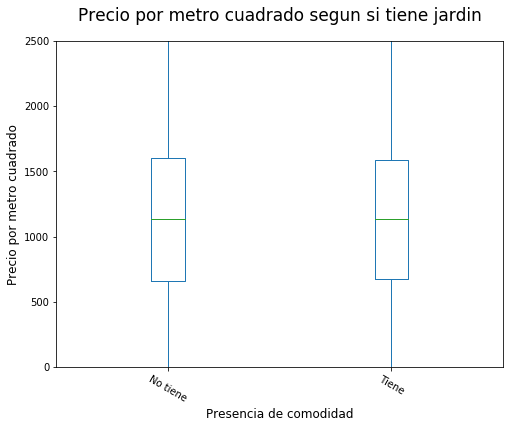

In [78]:
plot = jardin.plot(kind='box', title = "Precio por metro cuadrado segun si tiene jardin", rot = -30);
plot.set_xlabel("Presencia de comodidad")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene', 'Tiene'])
plot.set_ylim([0,2500])

plt.savefig('informe/imagenes/precio_m2_jardin.png', bbox_inches = 'tight', pad_inches = 0.5)

In [220]:
import random
i = random.randint(0,len(propiedades))
aux = 0
for x in propiedades.description:
    if aux >= i:
        print(x)
        break
    aux += 1

CODIGO: 536-232 ubicado en: Av Pte Peron 2984 -  Publicado por: CLAUDIO DONNINI PROPIEDADES. El precio es de USD 72000 null. Presidente Perón 2894 (Haedo)   2 AMBIENTES 40m2 CUB. / 2m2 semicubiertos 1er Piso  (FRENTE)  c/balcon apto profesional . Valor :72.000 USD     DETALLES DE TERMINACION: ASCENSOR CON COMANDO DE VOZ ELECTRÓNICA Paredes  yeso con guardacanto revestimiento ceramicos, guardas decorativas en Vitro fusion sanitario de baño, inodoro con mochila,bidet lavatorio c/vanitory , griferia de primera marca cocina mueble bajo mesada en melamina negro, mesada de mármol con bacha de acero inoxidable griferia mono comando cerámicos en cocina cocina apta para termo eléctrico instalación de gas, pintura de obra completa. DORMITORIO CON PLACARD AMPLIO BAÑERA CON HIDROMASAJES INSTALACION C/ AIRE ACONDICIONADO EN LIVING BALCÓN CON REJAS / CONEXIÓN LAVARROPAS EN BALCÓN CUBIERTO  -NO APTO CREDITOS . Publicado a través de Mapaprop


In [56]:
aire frio
cochera
piso radiante/ losa radiante
lago
golf
parrilla
gimnasio
vigilancia
cancha
tenis
cafe
juegos

parque   

-1

In [198]:
#for i in propiedades.description:
#    if "jacussi" in str(i):
#        print (i)

In [28]:
# link con algunos colores para los graficos
# https://matplotlib.org/users/colors.html
#https://matplotlib.org/examples/color/named_colors.html